In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
import numpy as np

In [2]:
seriecont = pd.read_csv("notebook_serie-contaminacion.csv", index_col="fecha",
                        parse_dates=["fecha"], date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m-%d'))
seriecont = seriecont.asfreq('d')

In [3]:
seriecont.head(10)

,medida
fecha,
2014-01-01,57.75
2014-01-02,75.75
2014-01-03,82.75
2014-01-04,57.25
2014-01-05,67.00
2014-01-06,87.50
2014-01-07,107.25
2014-01-08,135.75
2014-01-09,188.00


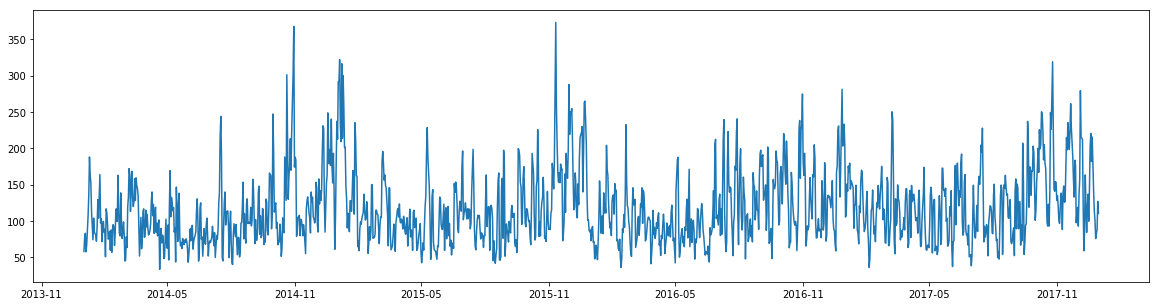

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(seriecont)

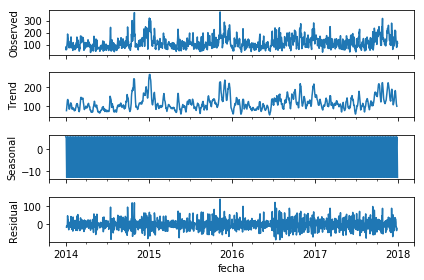

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(seriecont)
fig = decomposition.plot()

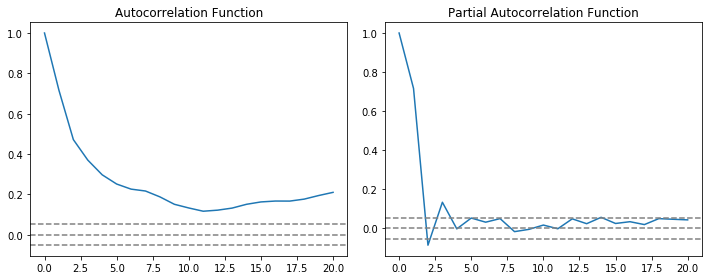

In [6]:
plt.figure(figsize=(10, 4))

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(seriecont, nlags=20)
lag_pacf = pacf(seriecont, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seriecont)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(seriecont)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seriecont)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(seriecont)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Credits: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [7]:
from statsmodels.tsa.arima_model import ARIMA

model_conf = ARIMA(seriecont, order=(2,1,3))
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.medida   No. Observations:                 1460
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -7237.366
Method:                       css-mle   S.D. of innovations             34.386
Date:                Fri, 05 Oct 2018   AIC                          14488.732
Time:                        11:35:12   BIC                          14525.735
Sample:                    01-02-2014   HQIC                         14502.536
                         - 12-31-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0349      0.076      0.462      0.644      -0.113       0.183
ar.L1.D.medida     0.4917      0.394      1.249      0.212      -0.280       1.263
ar.L2.D.medida     0.0958      0.202      0.475      0.635      -0.300       0.491
ma.L1.D.medida    -0.7078      0.393     -1.799      0.072      -1.479       0.063
ma.L2.D.medida    -0.3578      0.280     -1.279      0.201      -0.906       0.190
ma.L3.D.medida     0.0995      0.105      0.944      0.346      -0.107       0.306
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5596           +0.0000j            1.5596            0.0000
AR.2           -6.6903           +0.0000j            6.6903            0.5000
MA.1            1.0301           +0.0000j            1.0301            0.0000
MA.2           -2.0939           +0.0000j            2.0939            0.5000
MA.3            4.6597           +0.0000j            4.6597            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_conf = ARIMA(seriecont[:"2017-06-30"], order=(2,1,3))
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.medida   No. Observations:                 1276
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6311.512
Method:                       css-mle   S.D. of innovations             34.015
Date:                Fri, 05 Oct 2018   AIC                          12637.023
Time:                        11:35:14   BIC                          12673.083
Sample:                    01-02-2014   HQIC                         12650.566
                         - 06-30-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0062      0.076      0.081      0.935      -0.144       0.156
ar.L1.D.medida     0.9298      0.319      2.915      0.004       0.305       1.555
ar.L2.D.medida    -0.1433      0.180     -0.797      0.425      -0.496       0.209
ma.L1.D.medida    -1.1533      0.318     -3.631      0.000      -1.776      -0.531
ma.L2.D.medida    -0.0152      0.254     -0.060      0.952      -0.513       0.483
ma.L3.D.medida     0.1852      0.071      2.615      0.009       0.046       0.324
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3609           +0.0000j            1.3609            0.0000
AR.2            5.1288           +0.0000j            5.1288            0.0000
MA.1            1.0272           +0.0000j            1.0272            0.0000
MA.2            1.8685           +0.0000j            1.8685            0.0000
MA.3           -2.8138           +0.0000j            2.8138            0.5000
-----------------------------------------------------------------------------
"""

In [9]:
model_conf = ARIMA(seriecont[:"2017-06-30"], order=(2,1,2), freq="D")
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.medida   No. Observations:                 1276
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6312.222
Method:                       css-mle   S.D. of innovations             34.034
Date:                Fri, 05 Oct 2018   AIC                          12636.444
Time:                        11:35:15   BIC                          12667.353
Sample:                    01-02-2014   HQIC                         12648.052
                         - 06-30-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0056      0.084      0.066      0.947      -0.160       0.171
ar.L1.D.medida     0.2172      0.131      1.652      0.099      -0.040       0.475
ar.L2.D.medida     0.2024      0.097      2.089      0.037       0.012       0.392
ma.L1.D.medida    -0.4380      0.124     -3.529      0.000      -0.681      -0.195
ma.L2.D.medida    -0.5117      0.122     -4.200      0.000      -0.751      -0.273
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7501           +0.0000j            1.7501            0.0000
AR.2           -2.8234           +0.0000j            2.8234            0.5000
MA.1            1.0340           +0.0000j            1.0340            0.0000
MA.2           -1.8899           +0.0000j            1.8899            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
residuals = pd.DataFrame(model_fit.resid)

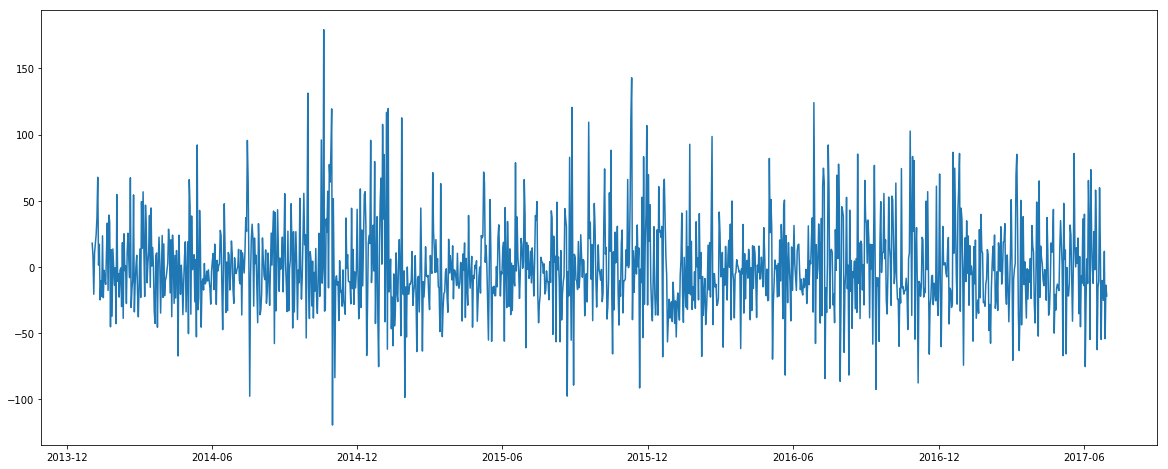

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(residuals)

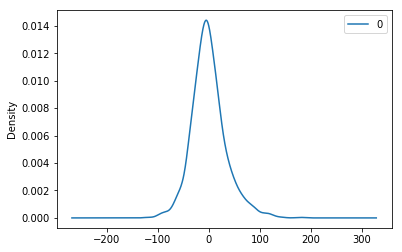

In [12]:
residuals.plot(kind='kde')

In [13]:
ini_forecast = pd.Timestamp("2017-01-01", freq="D")
ndays = 7

end_forecast = ini_forecast + ndays - 1

In [14]:
model_conf = ARIMA(seriecont[:ini_forecast-1], order=(2,1,2), freq="D")
model_fit = model_conf.fit()

forecast = model_fit.forecast(ndays)[0]
forecast = pd.DataFrame(forecast, columns=["forecast"], 
                        index=seriecont[ini_forecast:end_forecast].index)

In [15]:
forecast_daily = []
for d in range(ndays):
    ini_test = ini_forecast + d
    modelconf_day = ARIMA(seriecont[:ini_test - 1], order=(2,1,2), freq="D")
    modelfit_day = modelconf_day.fit()
    forecast_daily.append(modelfit_day.forecast(1)[0])

forecast_daily = pd.DataFrame(forecast_daily, columns=["forecast"], 
                              index=seriecont[ini_forecast:end_forecast].index)

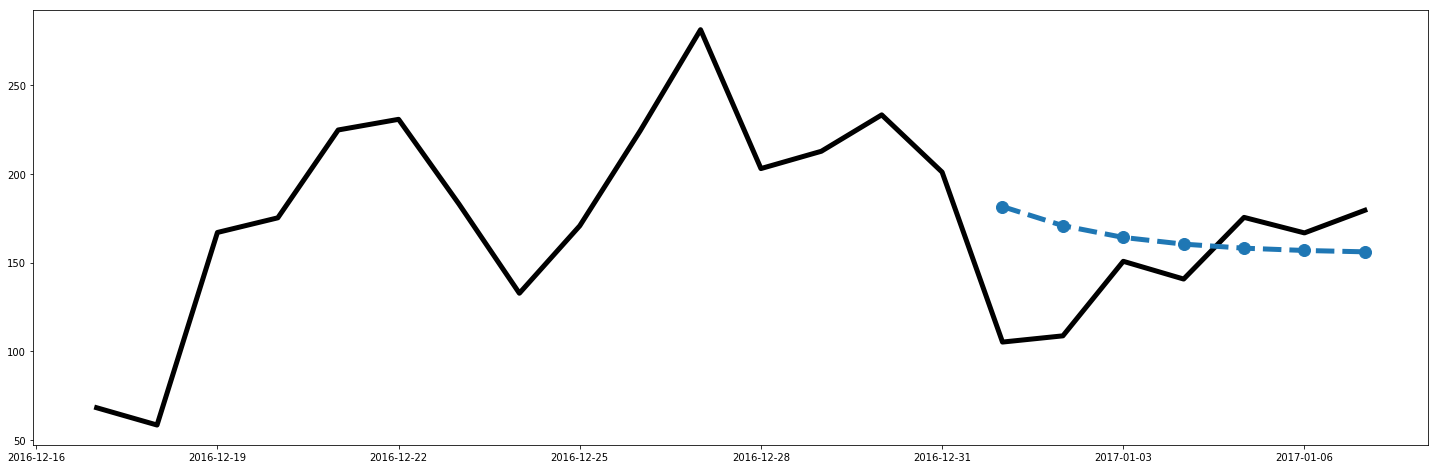

In [16]:
plt.figure(figsize=(25, 8))
plt.plot(seriecont[ini_forecast-15:end_forecast], linewidth=5, color="black")
plt.plot(forecast, linewidth=5, linestyle="--", markersize=12, marker='o')

(70, 290.05)

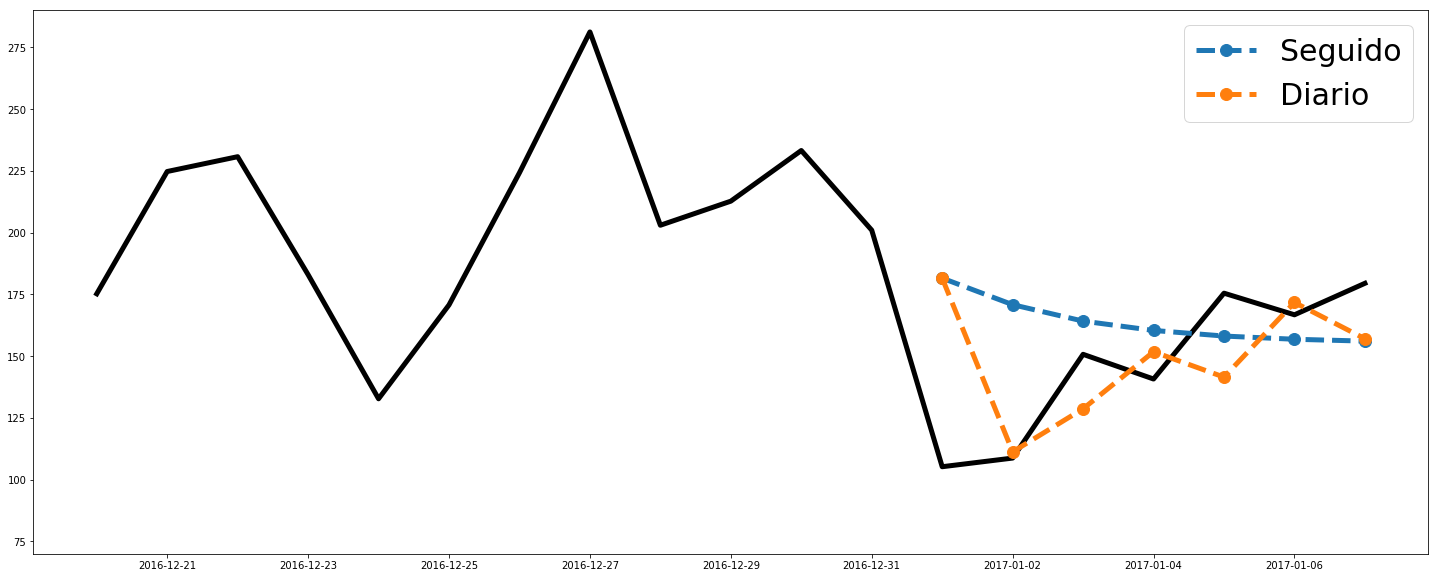

In [17]:
plt.figure(figsize=(25, 10))
plt.plot(seriecont[ini_forecast-12:end_forecast], linewidth=5, color="black")
plt.plot(forecast, linewidth=5, linestyle="--", markersize=12, marker='o', label="Seguido")
plt.plot(forecast_daily, linewidth=5, linestyle="--", markersize=12, marker='o', label="Diario")
plt.legend(prop={'size': 30})
plt.ylim(bottom=70)

(70, 290.05)

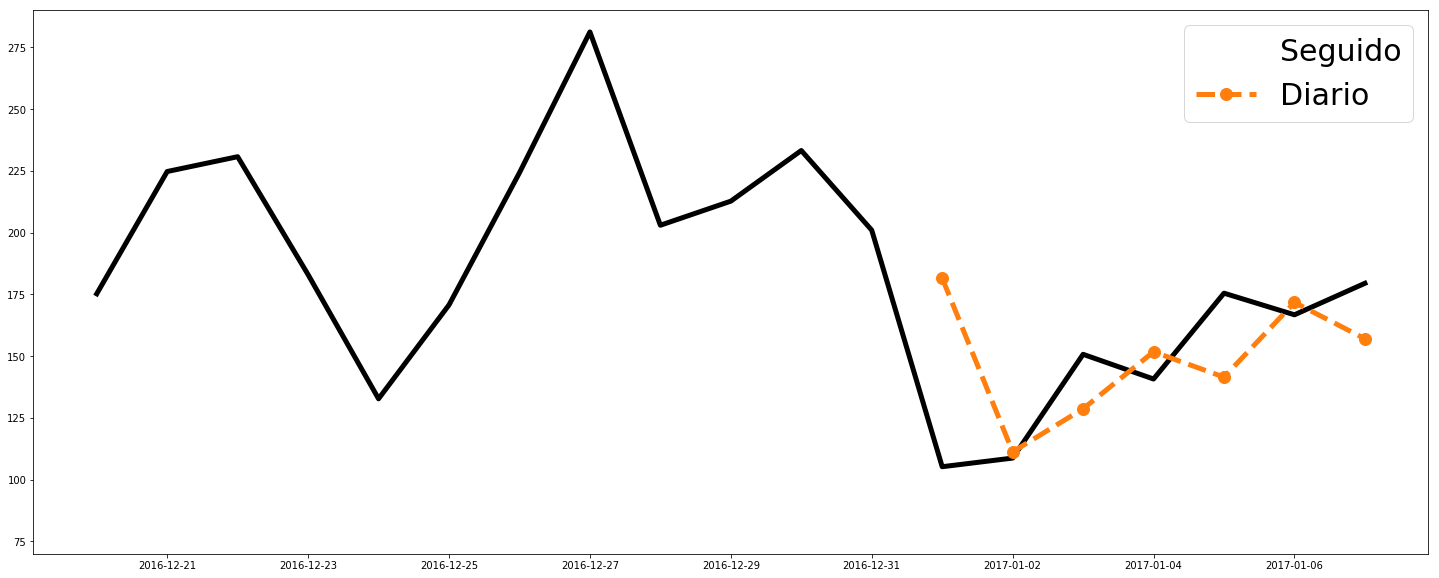

In [18]:
plt.figure(figsize=(25, 10))
plt.plot(seriecont[ini_forecast-12:end_forecast], linewidth=5, color="black")
plt.plot(forecast, linewidth=0, linestyle="--", markersize=0, marker='o', label="Seguido")
plt.plot(forecast_daily, linewidth=5, linestyle="--", markersize=12, marker='o', label="Diario")
plt.legend(prop={'size': 30})
plt.ylim(bottom=70)

In [19]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(forecast, seriecont[ini_forecast:ini_forecast+ndays-1]))
print(mean_absolute_error(forecast_daily, seriecont[ini_forecast:ini_forecast+ndays-1]))

31.742819714631047
24.76509438514149
